In [31]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn.datasets import load_breast_cancer


In [32]:
# Reads diabetes dataset
df = pd.read_csv(r'diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
#Scaling
sc_X = StandardScaler() 
X = sc_X.fit_transform(x) 
X[0:10]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732],
       [-0.84488505, -0.99820778, -0.16054575,  0.15453319,  0.12330164,
        -0.49404308, -0.92076261],
       [-1.14185152,  0.5040552 , -1.50468724,  0.90726993,  0.76583594,
         1.4097456 ,  5.4849091 ],
       [ 0.3429808 , -0.15318486,  0.25303625, -1.28821221, -0.69289057,
        -0.81134119, -0.81807858],
       [-0.25095213, -1.34247638, -0.98770975,  0.71908574,  0.07120427,
        -0.12597727, -0.676133  ],
       [ 1.82781311, -0.184482  , -3.57259724, -1.28821221, -0.69289057,
         0.41977549, -1.02042653],
       [-0.54791859,  2.38188392,  0.04624525,  1.53455054,  4.02192191,
        -0.18943689, -0.94794368],
       [ 1.23388019,  0.1284

In [60]:
x = df.values[:, :7]
y = df.values[:, 8]
# Use 80% and 20% split 
np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=0)

In [61]:
# build a logistic regression binary classifier
cl = LogisticRegression()
cl.fit(x_train, y_train)
y_pred = cl.predict(x_test)

In [62]:
# Report resulted accuracy, precision, and recall
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))

Accuracy: 0.8116883116883117
Precision: 0.7368421052631579
Recall: 0.5957446808510638


[[97 10]
 [19 28]]


Text(33.0, 0.5, 'Actual Label')

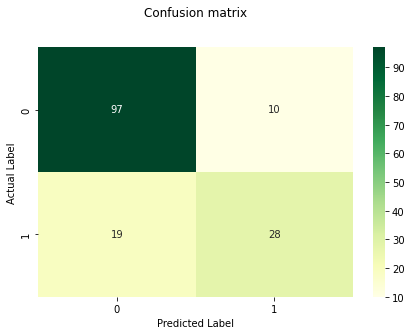

In [63]:
# plot the confusion matrix representing binary classifier. 
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

import seaborn as sns
from matplotlib.colors import ListedColormap

# Name of classes
class_names = [0, 1]
tick_marks = np.arange(len(class_names))
plt.subplots()
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Creating heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGn', fmt='g') 
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [64]:
########################################################################
#Part2

In [65]:
df = pd.DataFrame(pd.read_csv('diabetes.csv'))
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [66]:
x = df.values[:, :7]
y = df.values[:, 8]

In [67]:
#Scaling
sc_X = StandardScaler() 
X = sc_X.fit_transform(X)

In [68]:
#K-fold = 5
kfold = KFold(n_splits = 5, random_state = 0, shuffle = True)
model = LogisticRegression(solver = 'liblinear')
results = cross_val_score(model, x, y, cv = kfold)
# Output
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 76.427% (2.782%)


In [69]:
# K-fold = 10
kfold = KFold(n_splits = 10, random_state = 0, shuffle = True)
model = LogisticRegression(solver = 'liblinear')
results = cross_val_score(model, x, y, cv = kfold)
# Output
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 76.690% (3.434%)


In [70]:
###############################################################################
#Part 3

In [71]:
# Loading Datasheet
breast = load_breast_cancer()
X = breast.data
Y = breast.target

In [72]:
#Scaling
sc_X = StandardScaler() 
X = sc_X.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, random_state = 0)

In [74]:
classifier = LogisticRegression(random_state=0) 
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [75]:
Y_prediction = classifier.predict(X_test) 
Y_prediction

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1])

In [77]:
cnf_matrix = confusion_matrix(Y_test, Y_prediction) 
cnf_matrix

array([[45,  2],
       [ 2, 65]], dtype=int64)

In [79]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_prediction)) 
print("Precision:",metrics.precision_score(Y_test, Y_prediction)) 
print("Recall:",metrics.recall_score(Y_test, Y_prediction))

Accuracy: 0.9649122807017544
Precision: 0.9701492537313433
Recall: 0.9701492537313433


Text(33.0, 0.5, 'Actual Label')

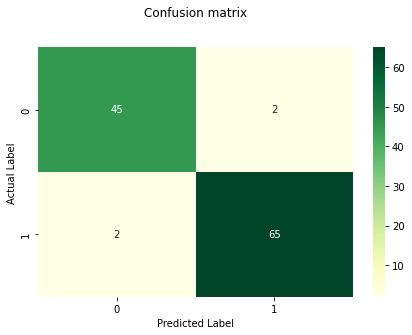

In [81]:
# Names of classes
class_names = [0, 1]
tick_marks = np.arange(len(class_names))
plt.subplots()
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Creating heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGn', fmt='g') 
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [82]:
### adding weights ###


In [85]:
import warnings
warnings.filterwarnings("ignore")

# Logistic Regression Model
C = [100, 50, 20, 10, 1]
for c in C:
    clf = LogisticRegression(penalty = 'l1', C = c, solver = 'liblinear')
    clf.fit(X_train, Y_train)
    print('C:', c)
    print('Training accuracy:', clf.score(X_train, Y_train))
    print('Test accuracy:', clf.score(X_test, Y_test))
    print('')

C: 100
Training accuracy: 0.9956043956043956
Test accuracy: 0.9473684210526315

C: 50
Training accuracy: 0.989010989010989
Test accuracy: 0.9473684210526315

C: 20
Training accuracy: 0.989010989010989
Test accuracy: 0.956140350877193

C: 10
Training accuracy: 0.989010989010989
Test accuracy: 0.9473684210526315

C: 1
Training accuracy: 0.989010989010989
Test accuracy: 0.956140350877193



In [86]:
###############################################################################
# Problem 4

In [87]:
breast = load_breast_cancer()
X = breast.data
Y = breast.target

In [88]:
sc_X = StandardScaler() 
X = sc_X.fit_transform(X)

In [89]:
#K-fold = 5
kfold = KFold(n_splits=5, random_state=0, shuffle=True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=kfold)

print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 97.193% (1.701%)


In [90]:
#K-fold = 10
kfold = KFold(n_splits=10, random_state=0, shuffle=True)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, X, Y, cv=kfold)

print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 97.895% (2.046%)


In [100]:
## Adding Weights

from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc_X = MinMaxScaler()
X_train_sc = sc_X.fit_transform(X_train)
X_test_sc = sc_X.fit_transform(X_test)

C = [100, 50, 20, 10, 1]

for c in C:
    clf = LogisticRegression(penalty = 'l1', C=c, solver = 'liblinear')
    clf.fit(X_train, Y_train)
    print('C:', c)
    print('Training accuracy:', clf.score(X_train_sc, Y_train))
    print('Test accuracy:', clf.score(X_test_sc, Y_test))
    print('')

C: 100
Training accuracy: 0.3648351648351648
Test accuracy: 0.41228070175438597

C: 50
Training accuracy: 0.3626373626373626
Test accuracy: 0.41228070175438597

C: 20
Training accuracy: 0.3626373626373626
Test accuracy: 0.41228070175438597

C: 10
Training accuracy: 0.3626373626373626
Test accuracy: 0.41228070175438597

C: 1
Training accuracy: 0.3626373626373626
Test accuracy: 0.41228070175438597

